### Inside the heads of Putnuts
#### An analysis of the Only Murders in the Building TV show subreddit

Milindi Kodikara

#### Step 0 : : Set up

In [1]:
from client import client
import helper
import visualiser

import string

import nltk 
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')

from datetime import datetime
import calendar
import pandas as pd
import pyLDAvis.lda_model

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/milindi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
subreddit_name = 'OnlyMurdersHulu'

In [3]:
reddit_client = client()

In [4]:
# sanity check
print('Username :: ', reddit_client.user.me())

Username ::  Yet_Another_Me_00


In [5]:
subreddit = reddit_client.subreddit(subreddit_name)

print('Subreddit :: ', subreddit)

Subreddit ::  OnlyMurdersHulu


In [6]:
all_new_posts = [*subreddit.new(limit=None)] 

new_season_announcement_date = datetime(2023, 10, 4, 0, 0, 0)
week_after_season_premier = datetime(2024, 9, 3, 23, 59, 59)

timestamp_new_season_announcement_date = calendar.timegm(new_season_announcement_date.utctimetuple())
timestamp_week_after_season_premier = calendar.timegm(week_after_season_premier.utctimetuple())

posts = [post for post in all_new_posts if timestamp_new_season_announcement_date <= post.created_utc <= timestamp_week_after_season_premier]

print('New season announcement date: ', new_season_announcement_date.strftime("%d/%m/%Y"))
print('New season announcement date timestamp: ', timestamp_new_season_announcement_date)

print('Week after season premier: ', week_after_season_premier.strftime("%d/%m/%Y"))
print('Week after season premier timestamp: ', timestamp_week_after_season_premier)

print(f'New posts: {len(all_new_posts)}\nNew posts from the new season announcement leading up to season premier: {len(posts)}')

New season announcement date:  04/10/2023
New season announcement date timestamp:  1696377600
Week after season premier:  03/09/2024
Week after season premier timestamp:  1725407999
New posts: 989
New posts from the new season announcement leading up to season premier: 971


In [7]:
oliver = '#275c4d'
mabel = '#af221d'
charles = '#c59103'

In [8]:
# TODO: Ask why use Tweet Tokenizer, why not word_tokenizer
tokeniser = TweetTokenizer()
stemmer = nltk.stem.PorterStemmer()

# add punctuation to stopwords list
stop_words = stopwords.words('english') + list(string.punctuation) + ['rt', 'via', '...', '…', '"', "'", '`', '-', '..']

In [9]:
unprocessed_token_lists = []
processed_token_lists = []

omitb_df = pd.DataFrame(columns=['Post', 'Num_comments', 'Author', 'UTC_Date', 'Date', 'Upvote_ratio', 'Unprocessed_tokens', 'Processed_tokens'])

for submission in posts:
    print_processing = True if posts.index(submission) <= 10 else False
    post_description = submission.selftext
    post_title = submission.title
    post_title_description = post_title + " " + post_description
    
    utc_date = submission.created_utc
    post_date = pd.to_datetime(datetime.fromtimestamp(submission.created_utc).strftime("%d/%m/%Y"), format="%d/%m/%Y")
    
    unprocessed_tokens = tokeniser.tokenize(post_title_description)
    unprocessed_token_lists.append(unprocessed_tokens)
    
    processed_tokens = helper.process(post_title_description, tokeniser, stemmer, stop_words, print_processing)
    # text, tokeniser, stop_words
    processed_token_lists.append(processed_tokens)
    
    submission.comments.replace_more(limit=None)
    for comment in submission.comments:
        comment_text = comment.body
        
        unprocessed_comment_tokens = tokeniser.tokenize(comment_text)
        unprocessed_tokens = unprocessed_tokens + unprocessed_comment_tokens
        unprocessed_token_lists.append(unprocessed_comment_tokens)
        
        processed_comment_tokens = helper.process(comment_text, tokeniser, stemmer, stop_words, False)
        processed_tokens = processed_tokens + processed_comment_tokens
        processed_token_lists.append(processed_comment_tokens)
    
    if submission.author is None:
        submission_author = 'None'
    else:
        submission_author = submission.author.name
        
    omitb_df.loc[len(omitb_df.index)] = [post_title_description, submission.num_comments, submission_author, utc_date, post_date, submission.upvote_ratio, unprocessed_tokens, processed_tokens]



------------------------------------
Initial text
Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu's official Only Murders in the Building Season 4 post episode discussion thread. 

Use this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\*

If you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don't get spoiled.

A reminder that the sub will be locked for new posts for 24 hours following the episode's release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).

A reminder on spoilers:

* Keep spoilers out of any post titles
* Do not share spoilers from future episodes under t

In [44]:
sample_df = omitb_df.head(100)
sample_df.to_csv('sample.csv', index=False)

In [11]:
len(omitb_df)

971

In [12]:
omitb_df.head()

,Post,Num_comments,Author,UTC_Date,Date,Upvote_ratio,Unprocessed_tokens,Processed_tokens
0,"Season 4 - Episode 2: ""Gates of Heaven"" (Post ...",781,hannahlemp,1.725338e+09,2024-09-03,0.99,"[Season, 4, -, Episode, 2, :, "", Gates, of, He...","[season, episode, gates, heaven, post, episode..."
1,Post your theories tying all seasons together,26,MetARosetta,1.725336e+09,2024-09-03,0.94,"[Post, your, theories, tying, all, seasons, to...","[post, theories, tying, seasons, together, rew..."
2,"Season 4 - Episode 2 ""Gates of Heaven"" (Live D...",274,hannahlemp,1.725334e+09,2024-09-03,0.95,"[Season, 4, -, Episode, 2, "", Gates, of, Heave...","[season, episode, gates, heaven, live, discuss..."
3,One that that still bugs me One that from seas...,12,Potential_Classic_89,1.725333e+09,2024-09-03,0.89,"[One, that, that, still, bugs, me, One, that, ...","[one, still, bugs, one, season, still, bugs, m..."
4,i’m not gonna make it to midnight eastern. i’m...,12,No_Analysis_6204,1.725328e+09,2024-09-03,0.94,"[i, ’, m, not, gonna, make, it, to, midnight, ...","[im, gonna, make, midnight, eastern, im, tired..."


In [13]:
omitb_df.tail()

,Post,Num_comments,Author,UTC_Date,Date,Upvote_ratio,Unprocessed_tokens,Processed_tokens
966,abandoned characters/storylines after watching...,25,StrawberryTime13,1.697249e+09,2023-10-14,0.97,"[abandoned, characters, /, storylines, after, ...","[abandoned, characters, storylines, watching, ..."
967,Season 4 time jump? I've been wondering about ...,16,Jbuster9,1.697243e+09,2023-10-14,0.85,"[Season, 4, time, jump, ?, I've, been, wonderi...","[season, time, jump, i've, wondering, logistic..."
968,The second Arconiac elimated. Sam is OUT!!! Wh...,3,EyUpItsDan,1.697242e+09,2023-10-14,0.84,"[The, second, Arconiac, elimated, ., Sam, is, ...","[second, arconiac, elimated, sam, who's, next,..."
969,One last check in at the Arconia and Goosebury...,0,ShowHoppersMrSal,1.697229e+09,2023-10-14,0.92,"[One, last, check, in, at, the, Arconia, and, ...","[one, last, check, arconia, goosebury, show, h..."
970,I wonder what Mabel's living situation will be...,50,CG23FR,1.697218e+09,2023-10-14,0.98,"[I, wonder, what, Mabel's, living, situation, ...","[wonder, mabel's, living, situation, next, sea..."


In [14]:
post = omitb_df.loc[[0]]

post

,Post,Num_comments,Author,UTC_Date,Date,Upvote_ratio,Unprocessed_tokens,Processed_tokens
0,"Season 4 - Episode 2: ""Gates of Heaven"" (Post ...",781,hannahlemp,1.725338e+09,2024-09-03,0.99,"[Season, 4, -, Episode, 2, :, "", Gates, of, He...","[season, episode, gates, heaven, post, episode..."


In [15]:
print('Post: {}\n---------\nAuthor: {}\n---------\nUpvote ratio: {}\n---------\nCreated date: {}\n---------'.format(post['Post'][0], post['Author'][0], post['Upvote_ratio'][0], post['Date'][0]))

Post: Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu's official Only Murders in the Building Season 4 post episode discussion thread. 

Use this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\*

If you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don't get spoiled.

A reminder that the sub will be locked for new posts for 24 hours following the episode's release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).

A reminder on spoilers:

* Keep spoilers out of any post titles
* Do not share spoilers from future episodes under this post
* Spoiler tag the post/content
* Kind

In [16]:
post['Post'][0]

'Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu\'s official Only Murders in the Building Season 4 post episode discussion thread. \n\nUse this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\\*\n\nIf you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don\'t get spoiled.\n\nA reminder that the sub will be locked for new posts for 24 hours following the episode\'s release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).\n\nA reminder on spoilers:\n\n* Keep spoilers out of any post titles\n* Do not share spoilers from future episodes under this post\n* Spoiler tag the post/con

In [17]:
post['Processed_tokens'][0]

['season',
 'episode',
 'gates',
 'heaven',
 'post',
 'episode',
 'discussion',
 'thread',
 'welcome',
 'official',
 'murders',
 'building',
 'season',
 'post',
 'episode',
 'discussion',
 'thread',
 'use',
 'thread',
 'discuss',
 'season',
 'episode',
 'gates',
 'heaven',
 'finished',
 'watching',
 'episode',
 'premiered',
 'september',
 '3rd',
 '12:00',
 'est',
 'currently',
 'watching',
 'episode',
 'please',
 'sure',
 'check',
 'relevant',
 'live',
 'discussion',
 'thread',
 'commenting',
 'get',
 'spoiled',
 'reminder',
 'sub',
 'locked',
 'new',
 'posts',
 'hours',
 'following',
 "episode's",
 'release',
 'information',
 'reminder',
 'spoilers',
 'keep',
 'spoilers',
 'post',
 'titles',
 'share',
 'spoilers',
 'future',
 'episodes',
 'post',
 'spoiler',
 'tag',
 'post',
 'content',
 'kindly',
 'correct',
 'users',
 'posting',
 'spoilers',
 'message',
 'mod',
 'needed',
 'comments',
 'contain',
 'spoilers',
 'utilize',
 'text',
 'remove',
 'spaces',
 'ex',
 'think',
 'dog',
 'liki

#### Step 1 : : Exploration

In [18]:
total_num_posts = len(omitb_df)
print(f'Total number of posts: {total_num_posts}')

Total number of posts: 971


In [19]:
total_num_comments = omitb_df['Num_comments'].sum()
print(f'Total number of comments: {total_num_comments}')

Total number of comments: 21120


In [20]:
total_data_items = total_num_posts + total_num_comments
print(f'Total data items: {total_data_items}')

Total data items: 22091


In [21]:
ordered_by_date = omitb_df.sort_values(['UTC_Date'], ascending=True)
print(f'Posts at new season announcement:\n{ordered_by_date.head()}\n\n')
print(f'Posts at season premier:\n{ordered_by_date.tail()}')

Posts at new season announcement:
                                                  Post  Num_comments  \
970  I wonder what Mabel's living situation will be...            50   
969  One last check in at the Arconia and Goosebury...             0   
968  The second Arconiac elimated. Sam is OUT!!! Wh...             3   
967  Season 4 time jump? I've been wondering about ...            16   
966  abandoned characters/storylines after watching...            25   

               Author      UTC_Date       Date  Upvote_ratio  \
970            CG23FR  1.697218e+09 2023-10-14          0.98   
969  ShowHoppersMrSal  1.697229e+09 2023-10-14          0.92   
968        EyUpItsDan  1.697242e+09 2023-10-14          0.84   
967          Jbuster9  1.697243e+09 2023-10-14          0.85   
966  StrawberryTime13  1.697249e+09 2023-10-14          0.97   

                                    Unprocessed_tokens  \
970  [I, wonder, what, Mabel's, living, situation, ...   
969  [One, last, check, in, at, 

Number of posts per date ordered:
          Date  count
258 2024-08-29     62
259 2024-08-30     39
263 2024-09-03     30
260 2024-08-31     30
257 2024-08-28     27


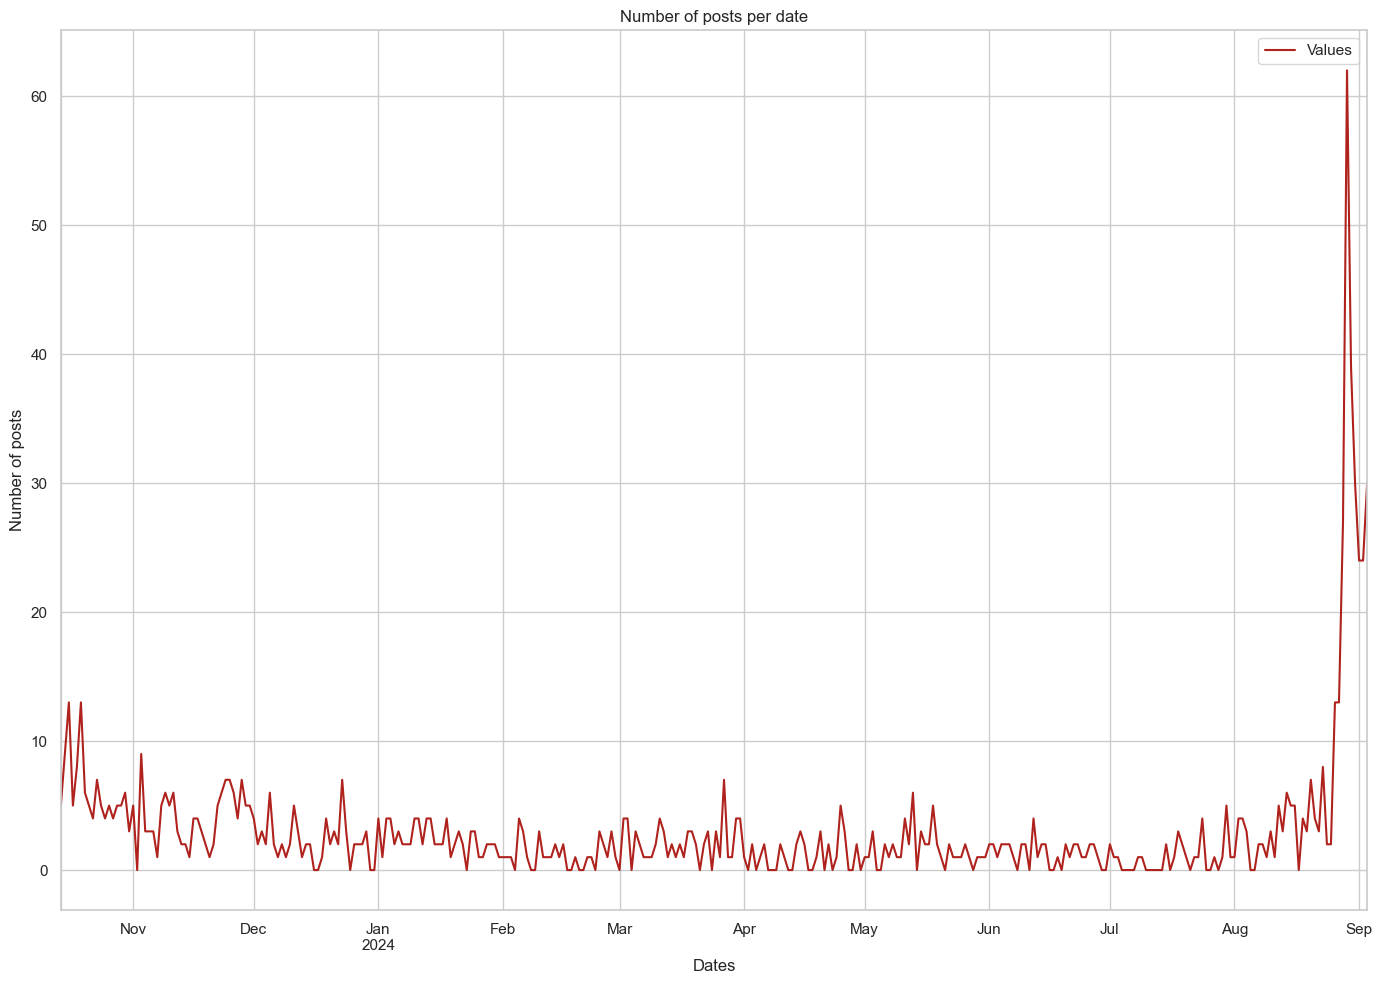

In [22]:
# Posts per date
num_posts_per_date = omitb_df.groupby('Date')['Post'].count()
visualiser.display_time_series_stats(num_posts_per_date, 'count', 'Number of posts per date', 'Dates', 'Number of posts', mabel)

Posts per author:
           Author  count
439   kaitlinsmom     38
408   goawayjules     35
214          None     22
516  taydraisabot     20
413    hannahlemp     18


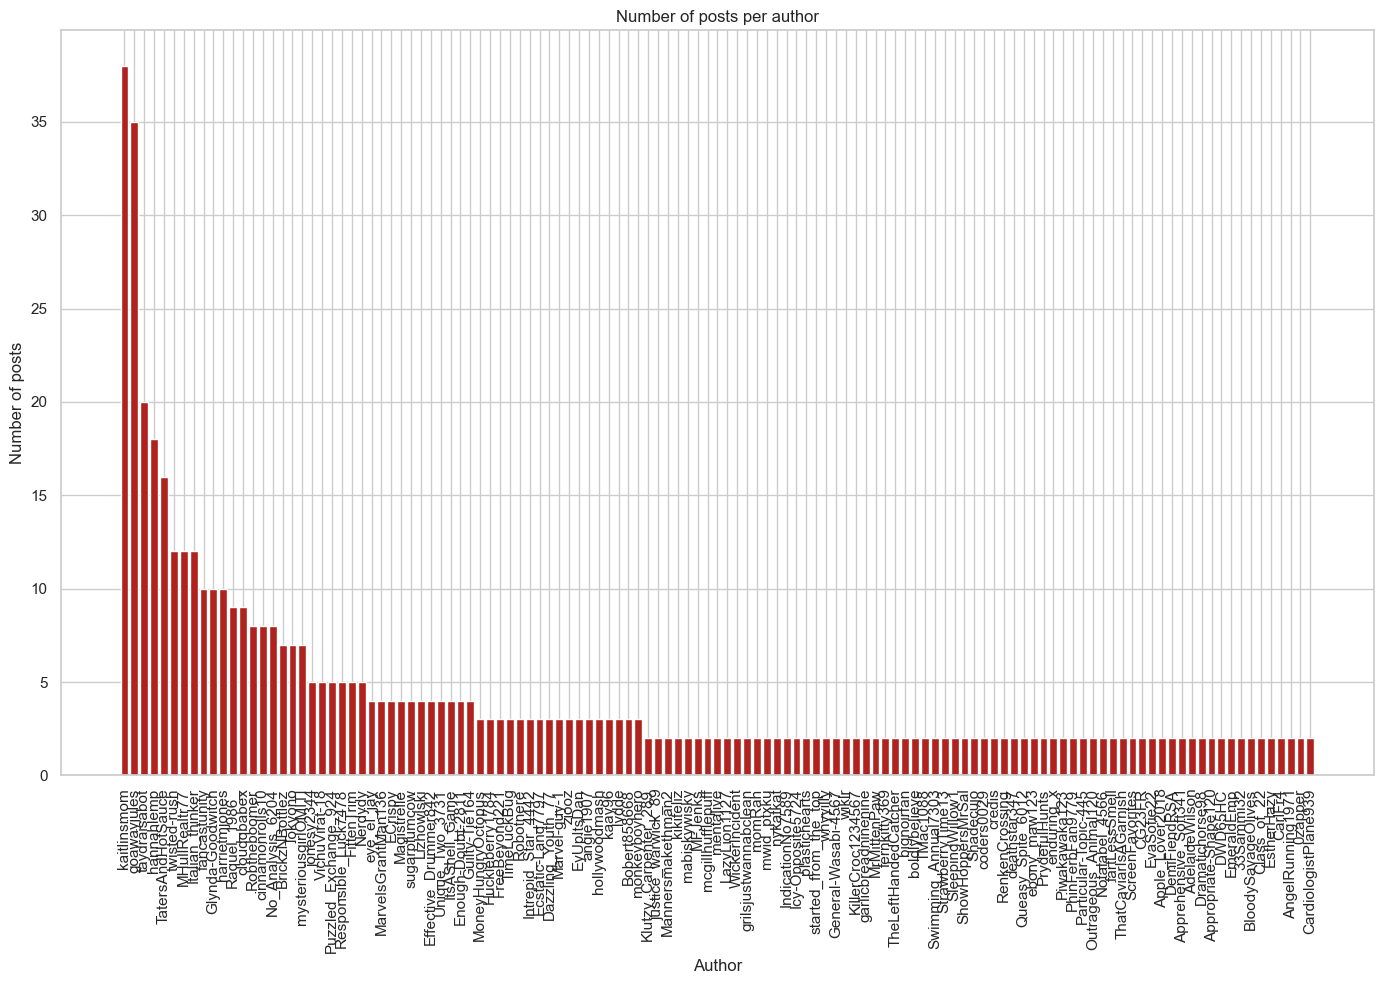

In [23]:
# Posts per author
num_posts_per_author = omitb_df.groupby('Author')['Post'].count()

num_posts_per_author_ordered = num_posts_per_author.reset_index(name='count').sort_values(['count'], ascending=False)
print(f'Posts per author:\n{num_posts_per_author_ordered.head()}')

filtered_df = num_posts_per_author_ordered[num_posts_per_author_ordered['count'] > 1 ]
filtered_df = filtered_df[filtered_df['Author'] != 'None']

num_posts_per_author_y = filtered_df['count']
author_x = filtered_df['Author']

visualiser.generate_bar_chart(author_x, num_posts_per_author_y, mabel, 'Number of posts per author', 'Author', 'Number of posts')

Number of comments per date ordered:
          Date   sum
256 2024-08-27  1853
263 2024-09-03  1531
258 2024-08-29   859
257 2024-08-28   638
259 2024-08-30   580


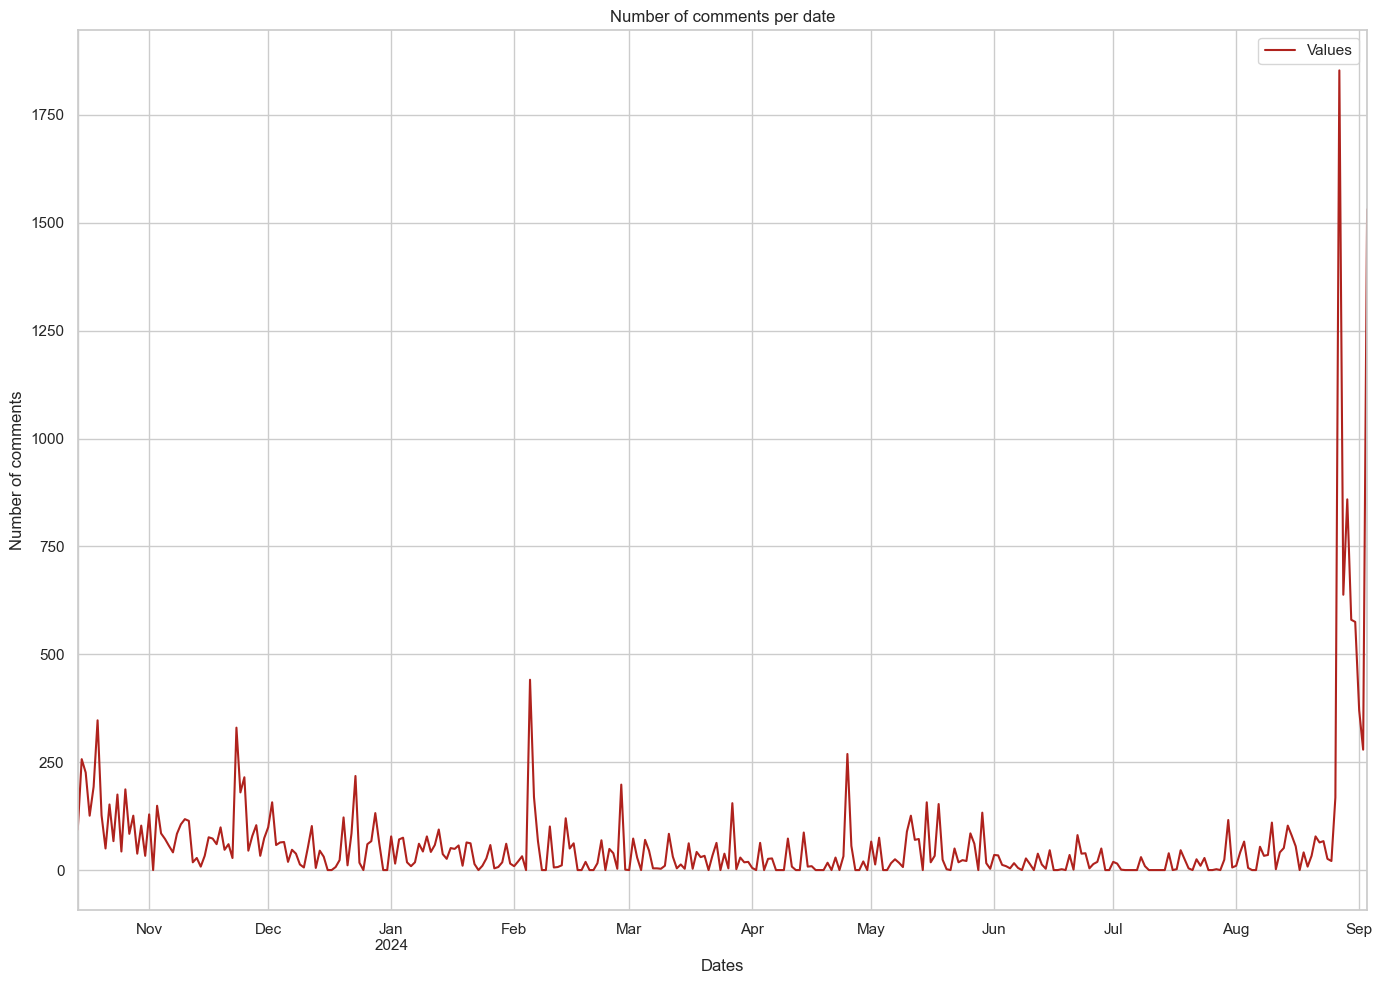

In [24]:
# Comments per date
num_comments_per_date = omitb_df.groupby('Date')['Num_comments'].sum()
visualiser.display_time_series_stats(num_comments_per_date, 'sum', 'Number of comments per date', 'Dates', 'Number of comments', mabel)

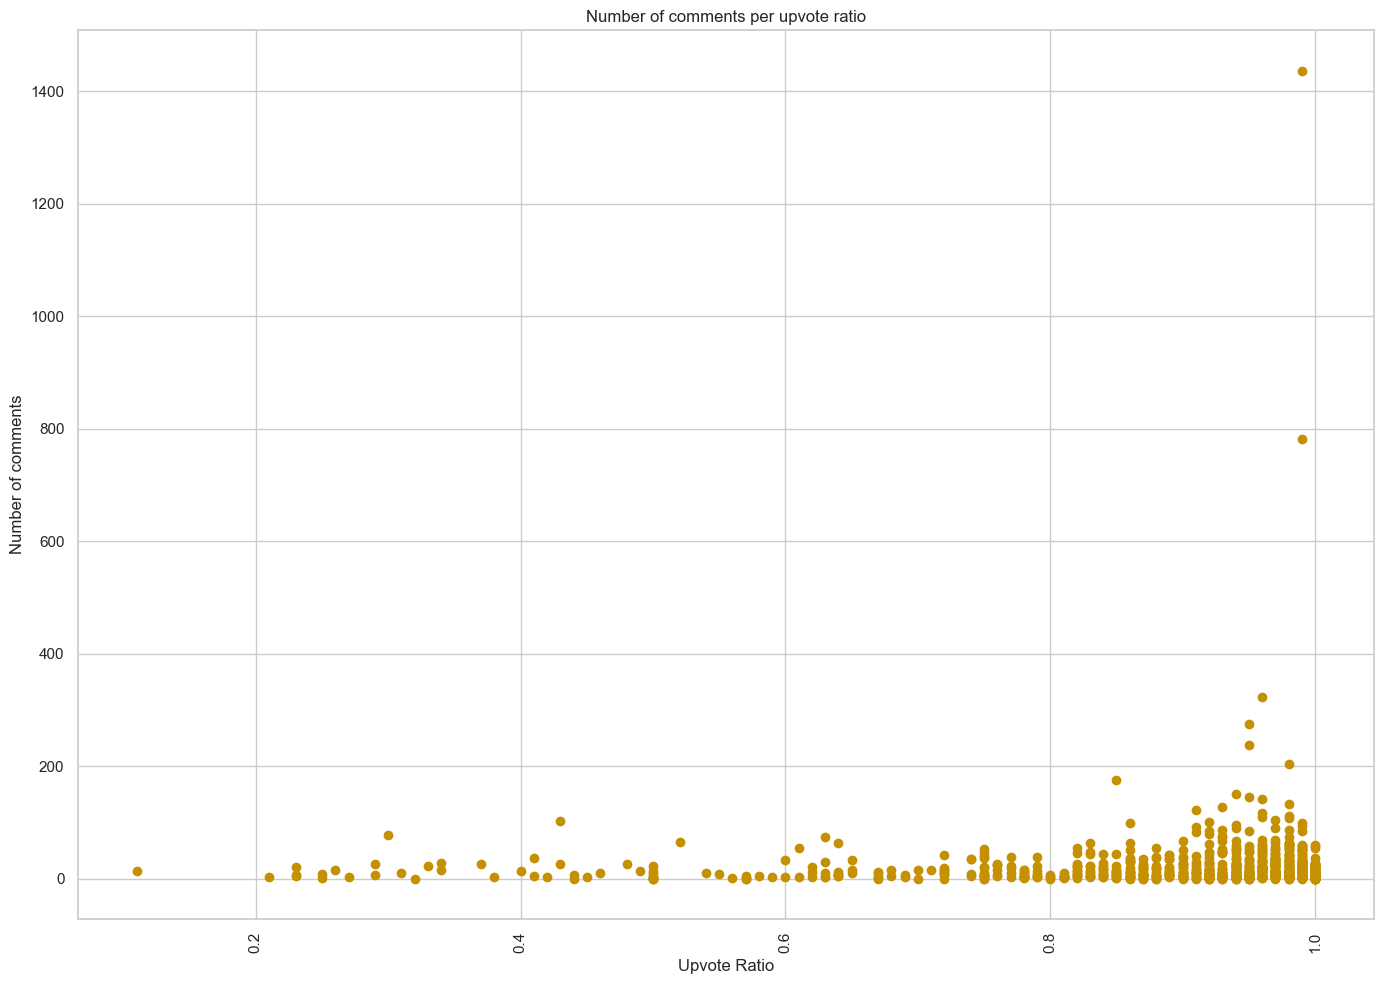

In [25]:
# Comments vs upvote_ratio 
num_comments_y = omitb_df['Num_comments'].tolist()
upvote_ratio_x = omitb_df['Upvote_ratio'].tolist()

visualiser.generate_scatter_plot(upvote_ratio_x, num_comments_y, charles, 'Number of comments per upvote ratio', 'Upvote Ratio', 'Number of comments')


#### Step 2 : : Pre-processing

-----------------
Term frequency
-----------------

.: 15030
the: 14583
,: 9688
I: 8355
to: 7773
a: 7012
and: 6874
’: 5648
of: 5183
in: 4930
!: 4567
it: 4524
is: 4324
that: 4017
?: 3791
was: 3548
for: 3009
s: 2571
be: 2488
but: 2274
this: 2269
on: 2210
with: 2163
her: 1932
she: 1912
season: 1896
they: 1885
): 1851
so: 1825
Charles: 1825
(: 1817
*: 1690
like: 1687
have: 1679
think: 1525
": 1505
he: 1484
t: 1405
just: 1388
The: 1381
not: 1362
as: 1347
you: 1301
show: 1295
would: 1246
about: 1178
or: 1154
if: 1121
are: 1119
from: 1112
----------------------------------


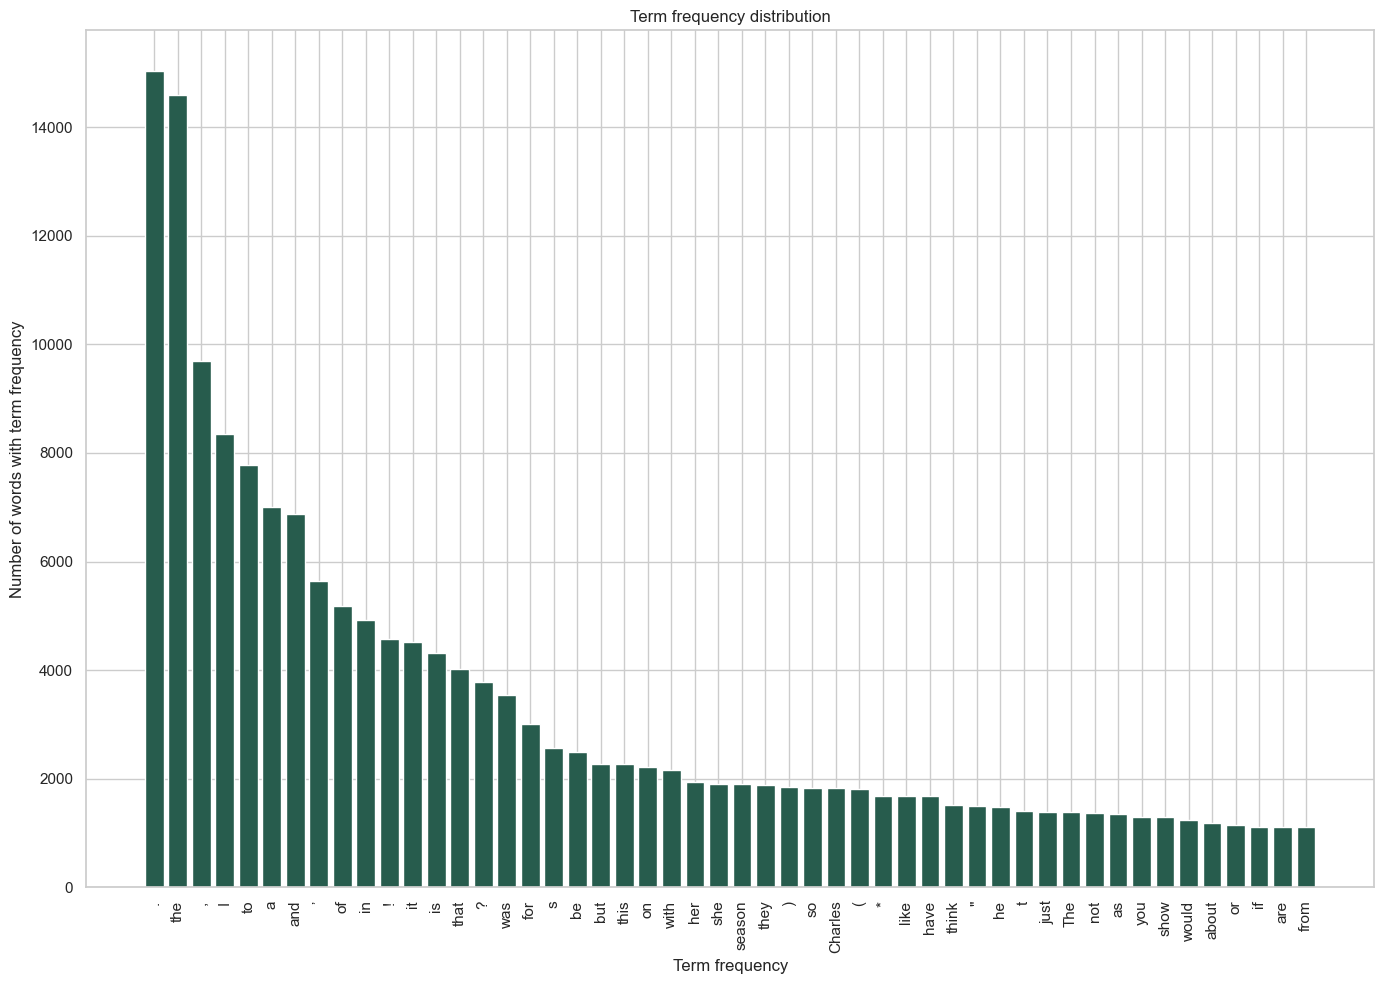

In [26]:
flatted_unprocessed_token_list = [element for innerList in unprocessed_token_lists for element in innerList]   

helper.compute_term_freq(flatted_unprocessed_token_list, True)

-----------------
Term frequency
-----------------

season: 2330
charles: 1846
like: 1783
think: 1537
show: 1305
would: 1272
one: 1096
sazz: 1004
love: 963
episode: 906
also: 899
mabel: 865
know: 809
could: 772
see: 756
get: 710
really: 701
time: 690
oliver: 664
im: 643
maybe: 628
someone: 566
i'm: 542
something: 530
character: 529
good: 513
much: 503
apartment: 498
people: 492
going: 486
murder: 484
killer: 468
building: 466
first: 461
martin: 455
new: 446
back: 446
even: 446
way: 438
dont: 417
make: 415
want: 404
still: 394
thought: 394
got: 386
great: 378
well: 373
howard: 367
last: 357
jan: 353
----------------------------------


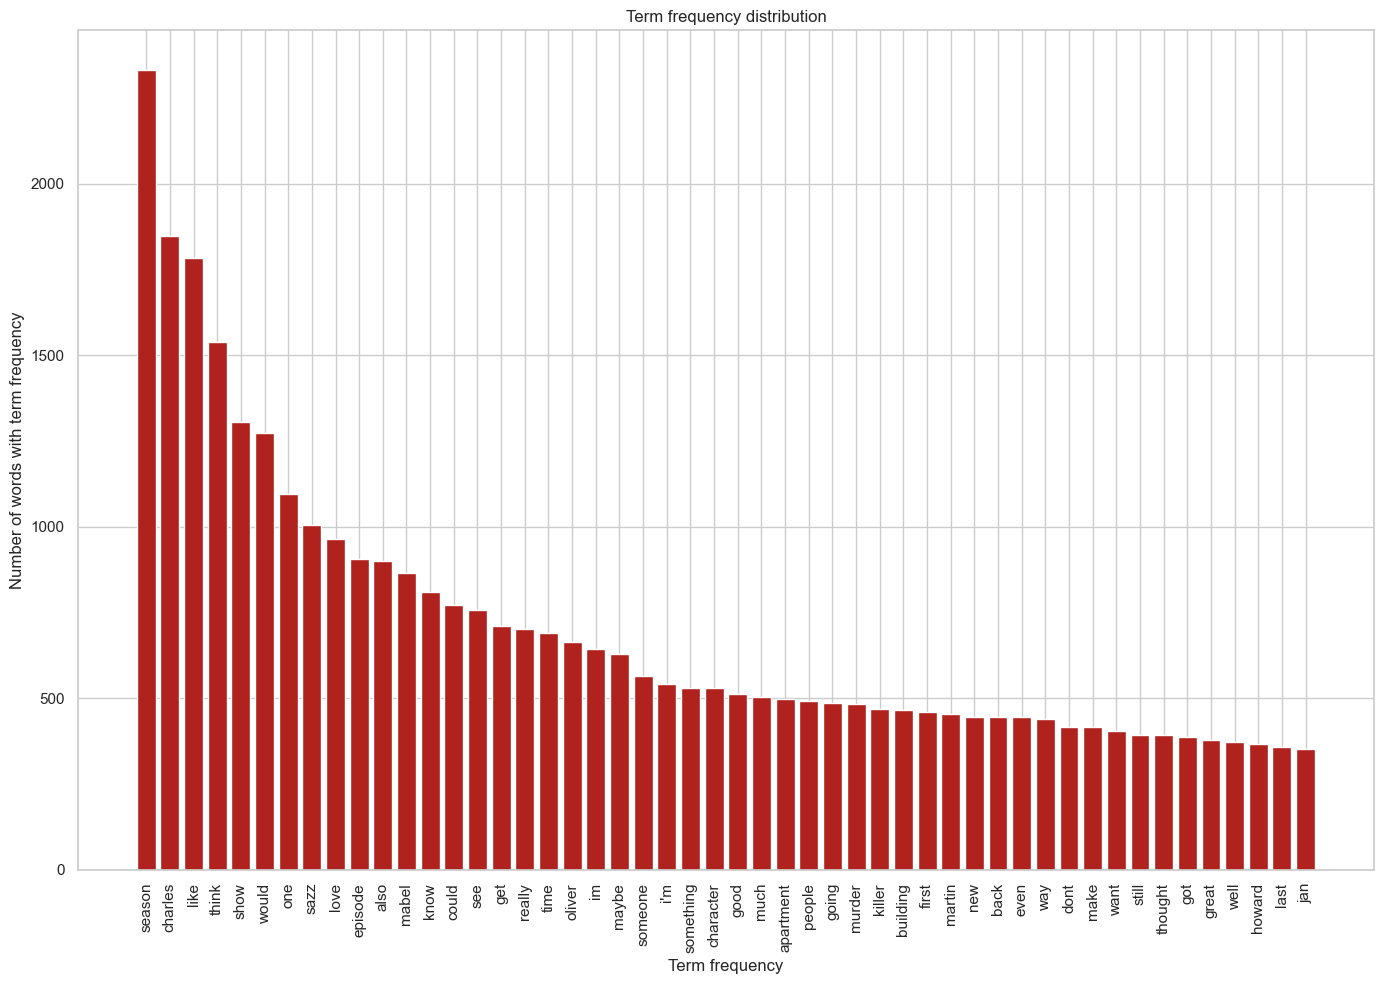

In [27]:
processed_token_lists = [element for innerList in processed_token_lists for element in innerList]   

helper.compute_term_freq(processed_token_lists, True, mabel)

In [28]:
print(f'Number of unprocessed tokens: {len(flatted_unprocessed_token_list)}\nNumber of processed tokens: {len(processed_token_lists)}')

Number of unprocessed tokens: 388204
Number of processed tokens: 169540


#### Step 3 : : Models

1. n-grams
2. upvotes
3. sentiment analysis 
    - count method
        <sentiment / dates>
    - vader
        <sentiment / dates>
4. topic modelling
    - term doc freq
    - TDA
    - params


In [29]:
top_50_bi_grams =  nltk.collocations.BigramCollocationFinder.from_words(processed_token_lists).ngram_fd.most_common(50)
top_50_tri_grams = nltk.collocations.TrigramCollocationFinder.from_words(processed_token_lists).ngram_fd.most_common(50)

In [30]:
# Sentiment analysis
count_sentiment_list = helper.sentiment_analysis('Count', omitb_df)



------------Analysing sentiment------------
Date: 2024-09-03 00:00:00

Post:
Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu's official Only Murders in the Building Season 4 post episode discussion thread. 

Use this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\*

If you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don't get spoiled.

A reminder that the sub will be locked for new posts for 24 hours following the episode's release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).

A reminder on spoilers:

* Keep spoilers out of any post titles
* Do not share spoilers f

In [31]:
for row in omitb_df.itertuples(index=True):
    print(f'\n------------\nIndex: {row[0]}\n------------\n{row.Post}\n------------\n\n')


------------
Index: 0
------------
Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu's official Only Murders in the Building Season 4 post episode discussion thread. 

Use this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\*

If you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don't get spoiled.

A reminder that the sub will be locked for new posts for 24 hours following the episode's release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).

A reminder on spoilers:

* Keep spoilers out of any post titles
* Do not share spoilers from future episodes under this post
* Spoil

In [32]:
vader_sentiment_list = helper.sentiment_analysis('Vader', omitb_df)



------------Analysing sentiment------------
Date: 2024-09-03 00:00:00

Post:
Season 4 - Episode 2: "Gates of Heaven" (Post Episode Discussion Thread) Welcome to r/OnlyMurdersHulu's official Only Murders in the Building Season 4 post episode discussion thread. 

Use this thread to discuss **Season 4: Episode 2: "Gates of Heaven"** **once you have finished watching the episode** which premiered September 3rd at 12:00 am EST.\*

If you are currently watching Episode 2, please be sure to check out the relevant Live Discussion Thread before commenting here, so you don't get spoiled.

A reminder that the sub will be locked for new posts for 24 hours following the episode's release. [More information here](https://www.reddit.com/r/OnlyMurdersHulu/comments/1ewm86s/only_murders_in_the_building_season_4_one_week_to/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button).

A reminder on spoilers:

* Keep spoilers out of any post titles
* Do not share spoilers f

In [33]:
# https://medium.com/bitgrit-data-science-publication/sentiment-analysis-on-reddit-tech-news-with-python-cbaddb8e9bb6

In [34]:
# Topic modelling
num_topic = 10
max_word_count_to_display = 15
num_features = 1500

In [35]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
tf = tf_vectorizer.fit_transform(processed_token_lists)

tf_feature_names = tf_vectorizer.get_feature_names_out()

In [36]:
lda_model = LatentDirichletAllocation(n_components =num_topic, max_iter=10, learning_method='online').fit(tf)

#### Step 4 : : Analysis

1. Present what topics are being discussed eg: top-K terms, word-cloud etc. by **topic modelling** 
2. What are the topics, does it correspond to recent news etc

In [37]:
# n-grams
top_50_bi_grams

[(('steve', 'martin'), 226),
 (('feel', 'like'), 164),
 (('martin', 'short'), 161),
 (('murders', 'building'), 153),
 (('gif', 'giphy'), 144),
 (('meryl', 'streep'), 109),
 (('dont', 'think'), 102),
 (('pickwick', 'triplets'), 100),
 (('last', 'season'), 99),
 (('looks', 'like'), 93),
 (('selena', 'gomez'), 90),
 (('anyone', 'else'), 89),
 (('scott', 'bakula'), 87),
 (('eugene', 'levy'), 87),
 (('charles', 'oliver'), 82),
 (('love', 'interest'), 80),
 (('next', 'season'), 75),
 (('paul', 'rudd'), 74),
 (('murder', 'mystery'), 74),
 (('red', 'herring'), 73),
 (('seems', 'like'), 70),
 (('upon', 'time'), 68),
 (('time', 'west'), 68),
 (('charles', 'apartment'), 67),
 (('season', 'one'), 67),
 (('first', 'episode'), 67),
 (('love', 'show'), 66),
 (('someone', 'else'), 63),
 (('dont', 'know'), 63),
 (('season', 'episode'), 61),
 (('west', 'tower'), 57),
 (('makes', 'sense'), 57),
 (('oliver', 'putnam'), 56),
 (('think', 'would'), 55),
 (('fly', 'wall'), 55),
 (('make', 'sense'), 55),
 (('c

In [38]:
top_50_tri_grams

[(('upon', 'time', 'west'), 68),
 (('steve', 'martin', 'martin'), 46),
 (('martin', 'martin', 'short'), 46),
 (('murders', 'building', 'season'), 36),
 (('death', 'rattle', 'dazzle'), 28),
 (('whole', 'new', 'direction'), 20),
 (('new', 'love', 'interest'), 18),
 (('episodes', 'episode', '4.10'), 18),
 (('true', 'crime', 'podcast'), 16),
 (('would', 'make', 'sense'), 16),
 (('charles', 'oliver', 'mabel'), 15),
 (('investigation', 'whole', 'new'), 15),
 (('first', 'two', 'seasons'), 15),
 (('bakula', 'says', 'hi'), 14),
 (('would', 'love', 'see'), 14),
 (('love', 'interest', 'every'), 14),
 (('interest', 'every', 'season'), 14),
 (('love', 'interest', 'season'), 13),
 (('id', 'love', 'see'), 13),
 (('charles', 'haden', 'savage'), 11),
 (('sends', 'investigation', 'whole'), 10),
 (('bullet', 'hole', 'window'), 10),
 (('stand', 'close', 'sting'), 10),
 (('one', 'ben', 'glenroy'), 10),
 (('note', 'jans', 'door'), 9),
 (('anyone', 'else', 'think'), 9),
 (('anyone', 'else', 'notice'), 9),
 (

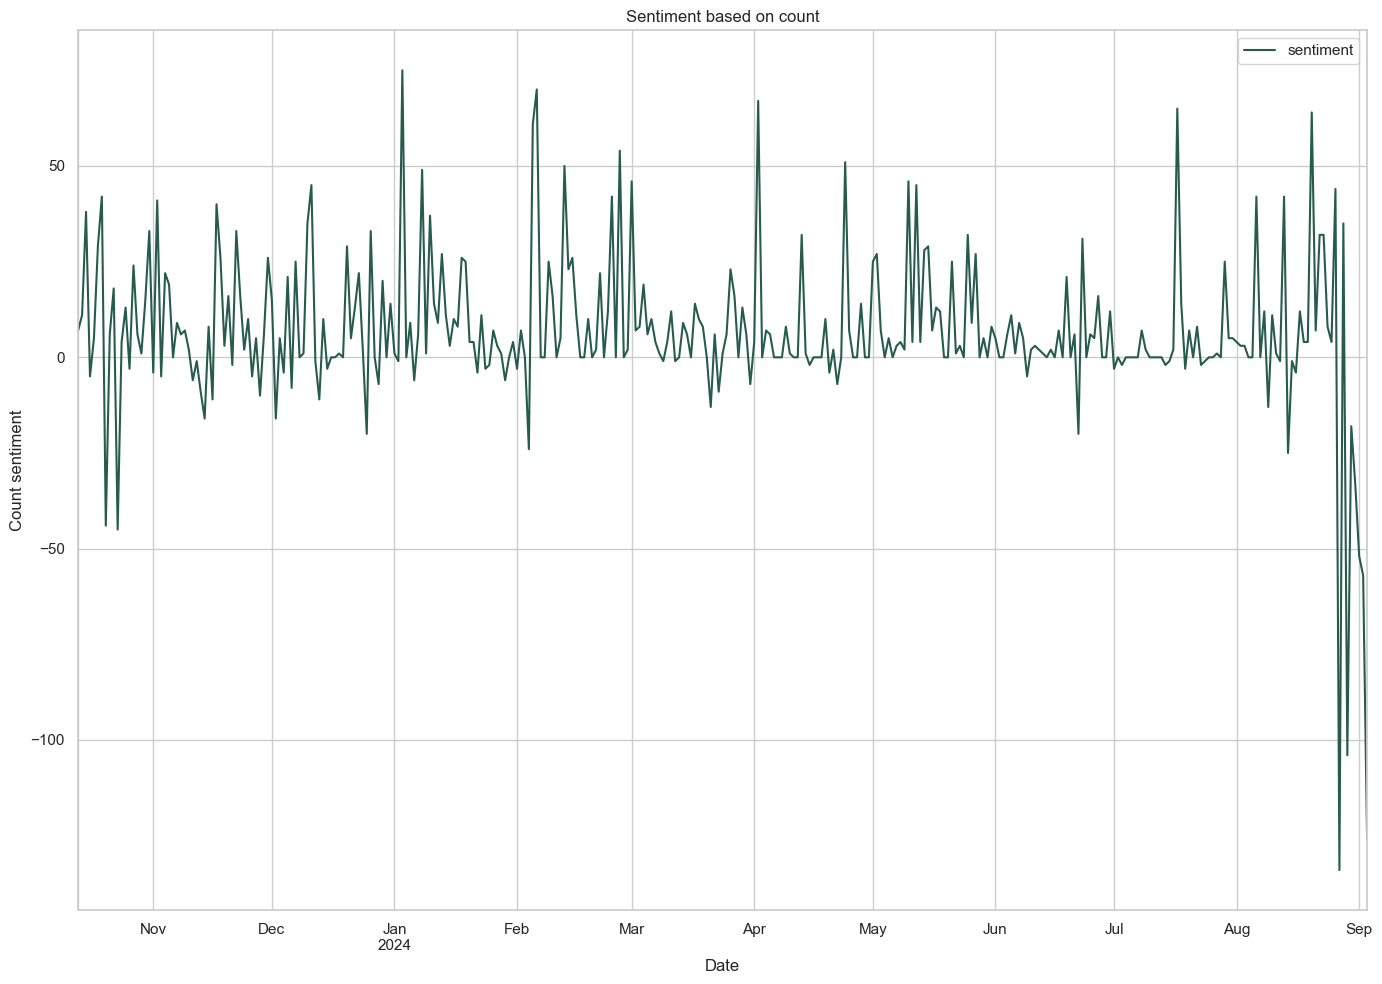

In [39]:
# Sentiment analysis
visualiser.generate_time_series(count_sentiment_list, 'Sentiment based on count', 'date', 'sentiment', 'Date', 'Count sentiment', oliver)

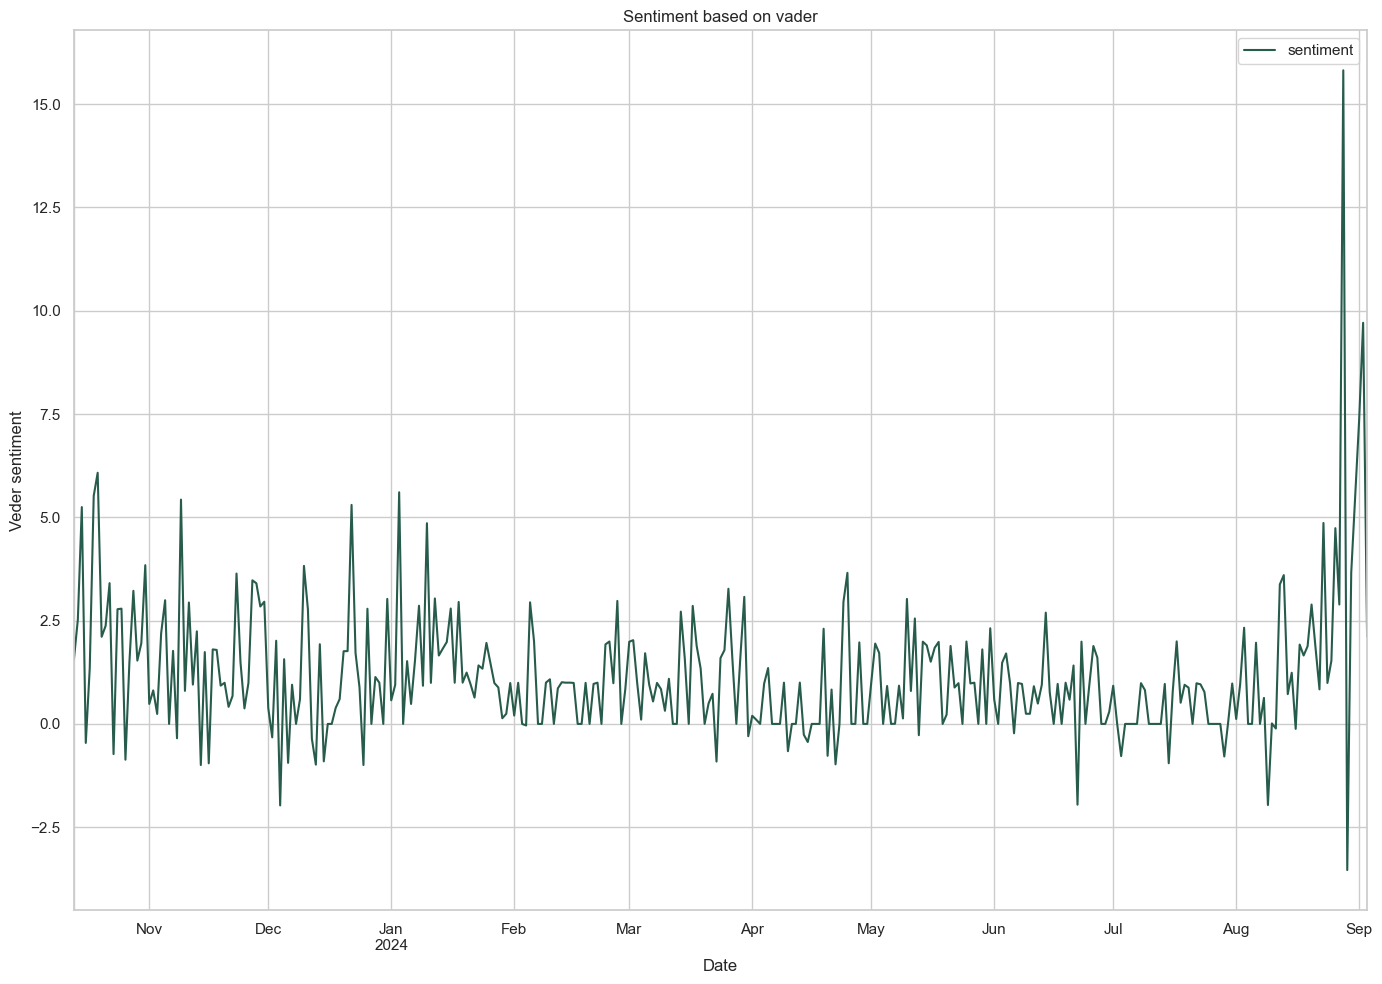

In [40]:
visualiser.generate_time_series(vader_sentiment_list, 'Sentiment based on vader', 'date', 'sentiment', 'Date', 'Veder sentiment', oliver)

In [41]:
visualiser.display_topics(lda_model, tf_feature_names, max_word_count_to_display)

Topic 0:
think way make dont killer watch lol episodes loretta mean s3 says long gif acting
Topic 1:
really omitb ben didnt death moriarty loved seen sense set tobert ll away thinking used
Topic 2:
like sazz time character martin jan steve said right makes big old bit years saying
Topic 3:
love going want say movie favorite life ve real yes work trying bad dead different
Topic 4:
characters podcast selena seasons series cast watching thats oh meryl dips bakula streep let teddy
Topic 5:
mabel good people thought apartment howard sure probably shes fun theory person hes come comedy
Topic 6:
season oliver know maybe got murders feel actually little kind play pretty wanted song saw
Topic 7:
charles new building lot scene look bunny things need getting triplets felt remember giphy theres
Topic 8:
end best trio mystery short la story shows joy better looks oscar wait far believe
Topic 9:
episode im murder theo great hope thing arconia definitely ive actors gets point crime case


In [42]:
# pyLDAvis
panel = pyLDAvis.lda_model.prepare(lda_model, tf, tf_vectorizer, mds='tsne')

pyLDAvis.display(panel)

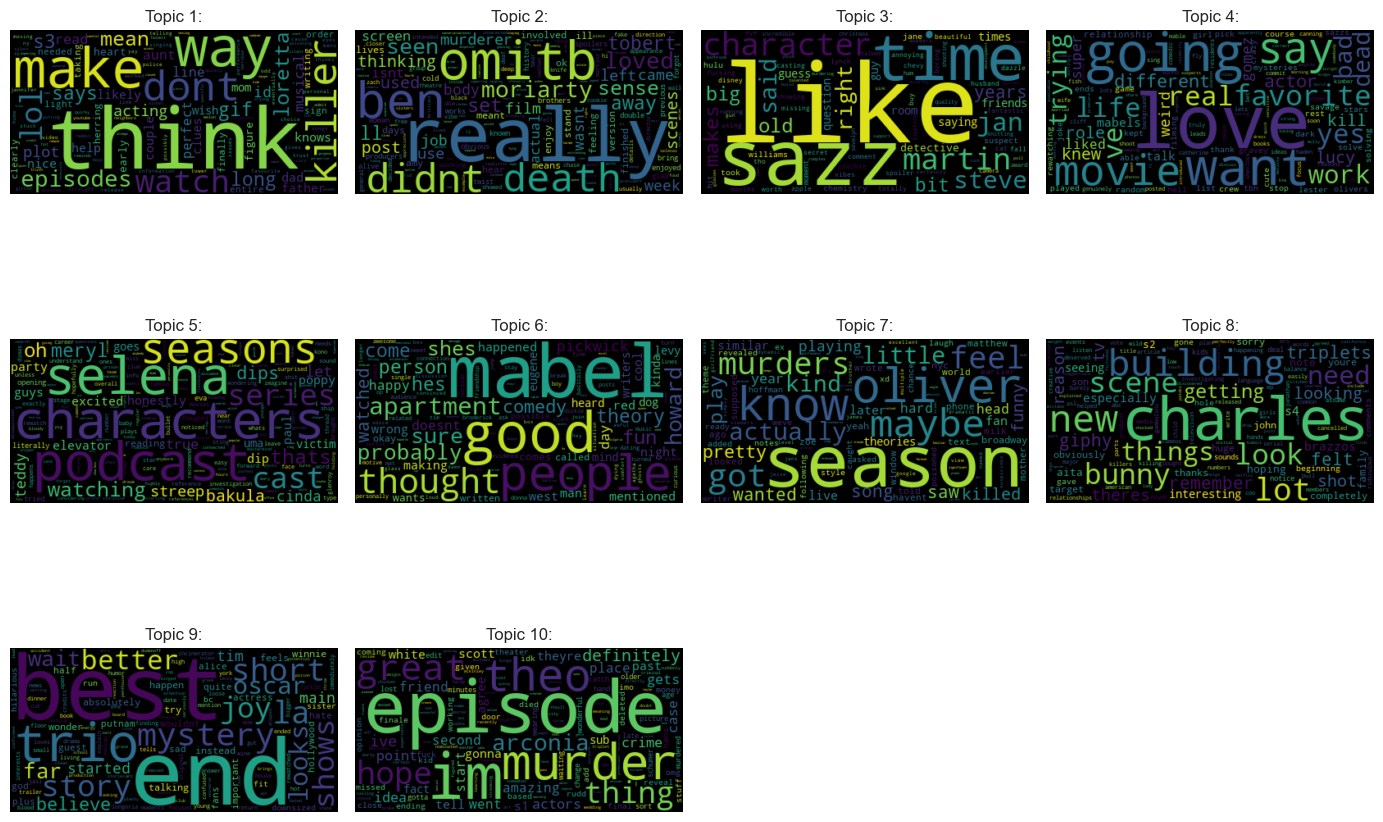

In [43]:
# wordcloud
visualiser.display_word_cloud(lda_model, tf_feature_names)